In [2]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action = "ignore", category = UserWarning)

In [4]:
path = '/home/ersel/Documents/GitHub/DataScience/DataSets/winequality-red.csv'
df = pd.read_csv(path, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


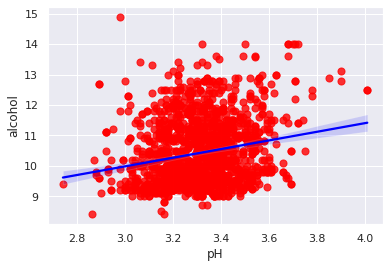

In [16]:
sns.set_theme(color_codes = True)
sns.regplot(data = df,
            x = 'pH', 
            y = 'alcohol', color = 'blue',
            scatter_kws = {'s': 50, 'color': 'red'});

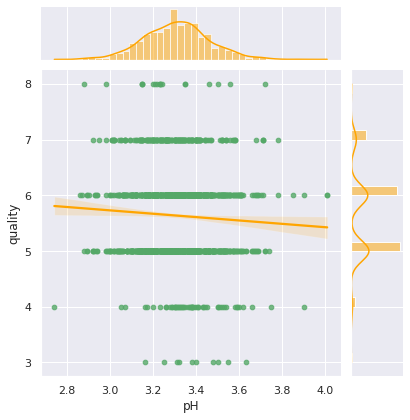

In [17]:
sns.jointplot(data = df,
             x = 'pH', 
             y = 'quality',
             kind = 'reg', 
             color = 'orange',
             scatter_kws = {'color': 'g', 's': 22});

In [18]:
# model fitting
X = df.drop('quality', axis = 1)
y = df['quality']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                               y,
                                               test_size = 0.2,
                                               random_state = 42)

In [19]:
Xtrain.shape, ytrain.shape

((1279, 11), (1279,))

In [20]:
Xtrain_scaled, Xtest_scaled = scale(Xtrain), scale(Xtest)

In [21]:
Xtrain_scaled

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [22]:
cv = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42)

In [23]:
cv

KFold(n_splits=10, random_state=42, shuffle=True)

In [24]:
# linear regression
linreg = LinearRegression().fit(Xtrain_scaled, ytrain)

In [25]:
lrScore = linreg.score(Xtrain_scaled, ytrain)
lrScore

0.3479926193529862

In [26]:
lrScores = -1 * (cross_val_score(linreg,
                                Xtrain_scaled,
                                ytrain,
                                cv = cv,
                                scoring = 'neg_root_mean_squared_error'))
lrScores

array([0.62488284, 0.66429979, 0.66716067, 0.6295327 , 0.66799473,
       0.69598139, 0.68086448, 0.63361346, 0.72020402, 0.61559878])

In [27]:
lrScore_train = np.mean(lrScores)
lrScore_train

0.660013287917183

In [28]:
# predict
y_pred = linreg.predict(Xtest_scaled)
lrScore_test = mean_squared_error(ytest, y_pred, squared = False)
lrScore_test

0.6251306211067054

In [29]:
## lasso
lasso_reg = LassoCV().fit(Xtrain_scaled, ytrain)
lassoScore = lasso_reg.score(Xtrain_scaled, ytrain)
lassoScore

0.3461549995218789

In [32]:
lassoScores = -1 * (cross_val_score(lasso_reg,
                                    Xtrain_scaled,
                                    ytrain,
                                    cv = cv,
                                    scoring = 'neg_root_mean_squared_error'))
lassoScores

array([0.62870156, 0.66402032, 0.66782287, 0.62423568, 0.665409  ,
       0.69646847, 0.67901585, 0.63136541, 0.72231439, 0.612298  ])

In [33]:
lassoScore_train = np.mean(lassoScores)
lassoScore_train

0.6591651547142681

In [34]:
# predict
y_pred = lasso_reg.predict(Xtest_scaled)
lassoScore_test = mean_squared_error(ytest, y_pred, squared = False)
lassoScore_test

0.6270782498171976

In [35]:
## Ridge regression
ridge_reg = RidgeCV().fit(Xtrain_scaled, ytrain)
ridgeScore = ridge_reg.score(Xtrain_scaled, ytrain)
ridgeScore

0.3479664103897633

In [36]:
ridgeScores = -1 * (cross_val_score(ridge_reg,
                                   Xtrain_scaled,
                                   ytrain,
                                   cv = cv,
                                   scoring = 'neg_root_mean_squared_error'))
ridgeScores

array([0.62526896, 0.66348007, 0.66731685, 0.62836003, 0.66768925,
       0.69504426, 0.68018788, 0.63400813, 0.72055488, 0.61482855])

In [38]:
ridgeScore_train = np.mean(ridgeScores)
ridgeScore_train

0.6596738864224316

In [39]:
# predict
y_pred = ridge_reg.predict(Xtest_scaled)
ridgeScore_test = mean_squared_error(ytest, y_pred, squared = False)
ridgeScore_test

0.6252454963271397

### PCR

In [40]:
pca = PCA()
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
Xtrain_pca.shape

(1279, 11)

In [42]:
pca.explained_variance_ratio_

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627, 0.03883888, 0.03129468, 0.01600997,
       0.0056793 ])

In [45]:
pd.DataFrame(pca.components_.T).loc[:4, :]

,0,1,2,3,4,5,6,7,8,9,10
0,0.486819,-0.109289,-0.151640,-0.211996,-0.116956,0.151683,-0.334642,-0.176844,-0.205265,-0.236659,0.636428
1,-0.230695,0.293355,-0.442608,0.128183,0.204407,0.476617,-0.468471,-0.081351,0.129516,0.369572,-0.001684
2,0.467369,-0.157400,0.220984,-0.097646,-0.055669,0.067697,0.140384,-0.383500,0.348557,0.629722,-0.076931
3,0.152336,0.239182,0.049249,-0.406056,0.722412,0.040310,0.280960,0.324788,0.014840,0.076839,0.195514
4,0.216295,0.149466,-0.021770,0.663833,0.286446,0.234620,0.391538,-0.352225,-0.128421,-0.236930,0.051357


In [56]:
linReg = LinearRegression()
rmse_list = []

for i in range(1, Xtrain_pca.shape[1] + 1):
    rmse_score = -1 * cross_val_score(linReg,
                                     Xtrain_pca[:, :i],
                                     ytrain,
                                     cv = cv,
                                     scoring = 'neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [57]:
rmse_list

[0.8031625853284308,
 0.7343312058799236,
 0.6742899891697901,
 0.6709500084239395,
 0.6676164617485616,
 0.6682324071161514,
 0.6638854867004651,
 0.6635084510224303,
 0.6590578212521203,
 0.6588098396621652,
 0.6600132879171828]

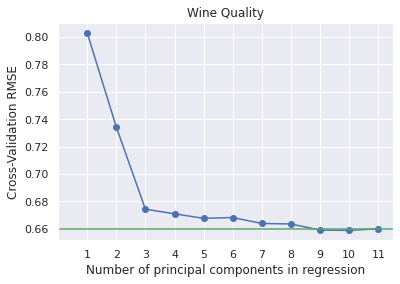

In [58]:
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Wine Quality')
plt.xlim(xmin = -1);
plt.xticks(np.arange(Xtrain_pca.shape[1]), np.arange(1, Xtrain_pca.shape[1] + 1))
plt.axhline(y = lrScore_train, color = 'g', linestyle = '-');

In [59]:
# predict
linReg_pca = LinearRegression().fit(Xtrain_pca[:, :9], ytrain)
linReg_pca.score(Xtrain_pca[:, :9], ytrain)

0.34558068824698185

In [60]:
pcaScore_train = -1 * cross_val_score(linReg_pca,
                                      Xtrain_pca[:, :9],
                                      ytrain,
                                      cv = cv,
                                      scoring = 'neg_root_mean_squared_error').mean()
pcaScore_train

0.6590578212521203

In [62]:
# for test set
Xtest_pca = pca.transform(Xtest_scaled)[:, :9]
Xtest_pca.shape

(320, 9)

In [63]:
# predict on test data
preds = linReg_pca.predict(Xtest_pca)
pcaScore_test = mean_squared_error(ytest, preds, squared = False)
pcaScore_test

0.6273651631861391

In [65]:
# Evaluation
train_metrics = np.array([round(lrScore_train, 3),
                         round(lassoScore_train, 3),
                         round(ridgeScore_train, 3),
                         round(pcaScore_train, 3)])

train_metrics = pd.DataFrame(train_metrics, columns = ['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression',
                      'Lasso Regression',
                      'Ridge Regression',
                      'PCR 9 components']
train_metrics

,RMSE (Train Set)
Linear Regression,0.660
Lasso Regression,0.659
Ridge Regression,0.660
PCR 9 components,0.659


In [67]:
# Evaluation
test_metrics = np.array([round(lrScore_test, 3),
                         round(lassoScore_test, 3),
                         round(ridgeScore_test, 3),
                         round(pcaScore_test, 3)])

test_metrics = pd.DataFrame(test_metrics, columns = ['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression',
                      'Lasso Regression',
                      'Ridge Regression',
                      'PCR 9 components']
test_metrics

,RMSE (Test Set)
Linear Regression,0.625
Lasso Regression,0.627
Ridge Regression,0.625
PCR 9 components,0.627
